# Titanic Survival Prediction Project
**Author:** Eric Meyer

**Date:** 03/26/2025  

**Introduction:** In this project, we will use the Titanic dataset to predict the survival of passengers based on various input features. The dataset provides information on attributes such as age, sex, and class of the passengers, which will be used to train machine learning models to predict whether a passenger survived or not.


## Section 1: Import and Inspect the Data

In [2]:
# Importing the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC

In [3]:
# Load Titanic dataset directly from seaborn library
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [5]:
# Impute missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill in missing values for embark_town using the mode:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

- Add family_size - number of family members on board
- Convert categorical "sex" to numeric
- Convert categorical "embarked" to numeric
- Binary feature - convert "alone" to numeric

In [6]:
# Create new features based on existing columns
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)



## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

We will choose different combinations of features for the analysis, with the target variable being the "survived" column.

- Case 1: Input Features: alone, Target: survived

- Case 2: Input Features: age, Target: survived

- Case 3: Input Features: age and family_size, Target: survived

In [34]:
# # Case 1: alone only
# X = titanic[['alone']]
# y = titanic['survived']

# # Case 2: age only
X = titanic[['age']]
y = titanic['survived']

# # Case 3: age + family_size
# # X = titanic[['age', 'family_size']]
# # y = titanic['survived']

### Reflection 3:

- Why were these features selected?
<br> **The selected features like "alone", "age", and "family_size" are expected to influence survival likelihood, as they can reflect a passenger's social situation and age group.**

- Are there features that are likely to be highly predictive of survival?
<br> **Features like "sex", "class", and "age" are known to be strong predictors of survival based on historical data.**

## Section 4: Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [27]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))


Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [28]:
# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [29]:
# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix

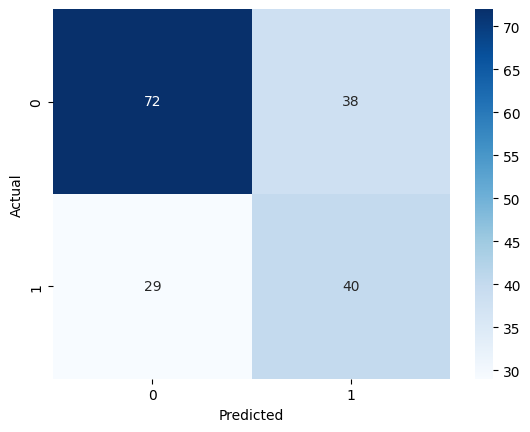

In [30]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

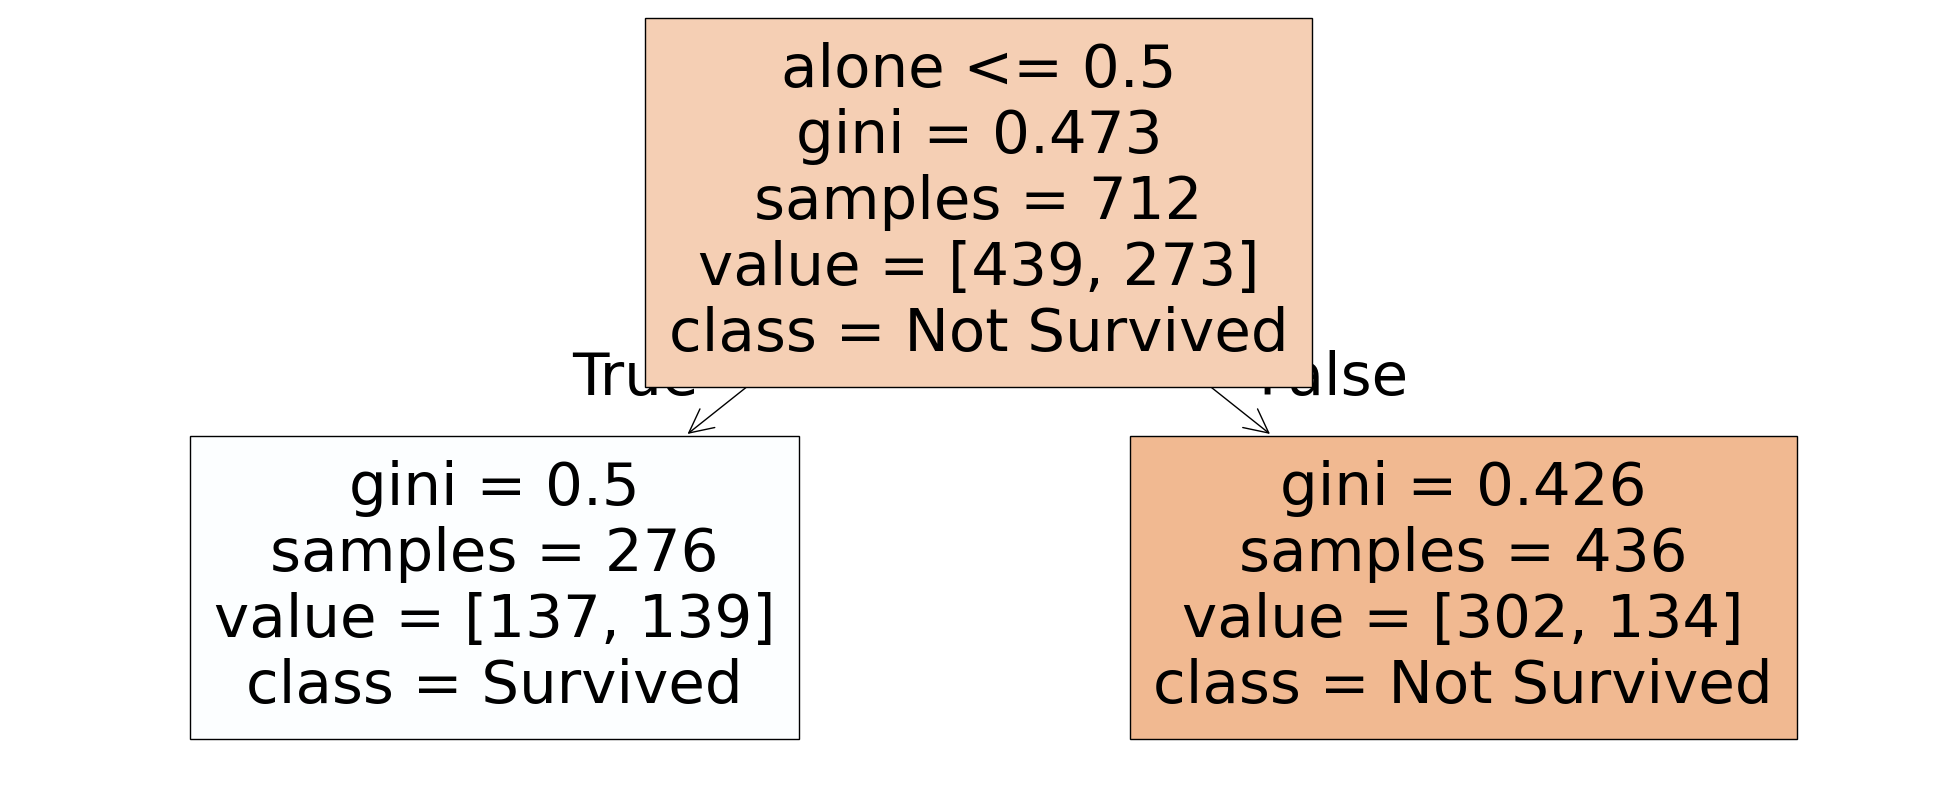

In [31]:
# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.6 Case 2 -- Steps 4.1 - 4.5

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



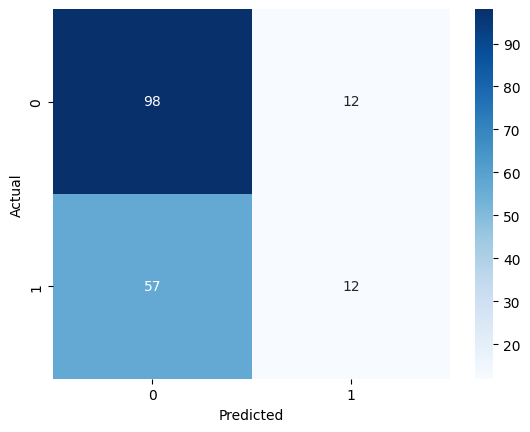

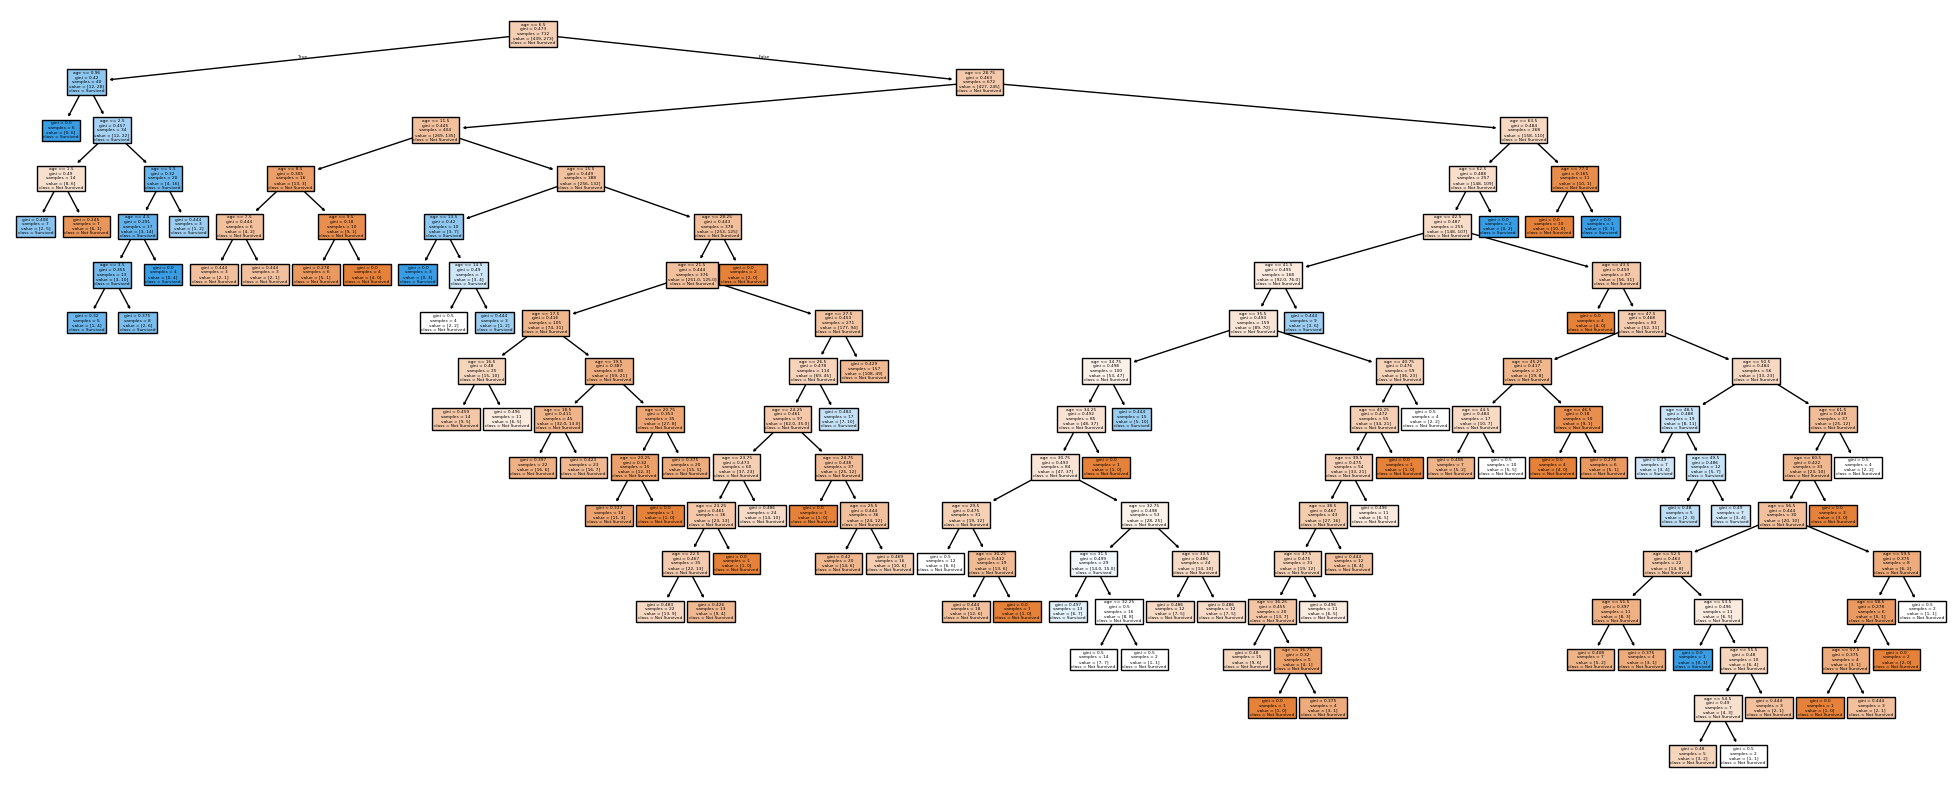

In [35]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### 4.7 Case 3 -- Steps 4.1 - 4.5

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



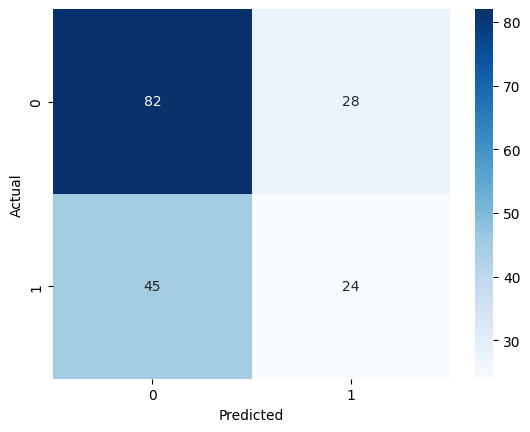

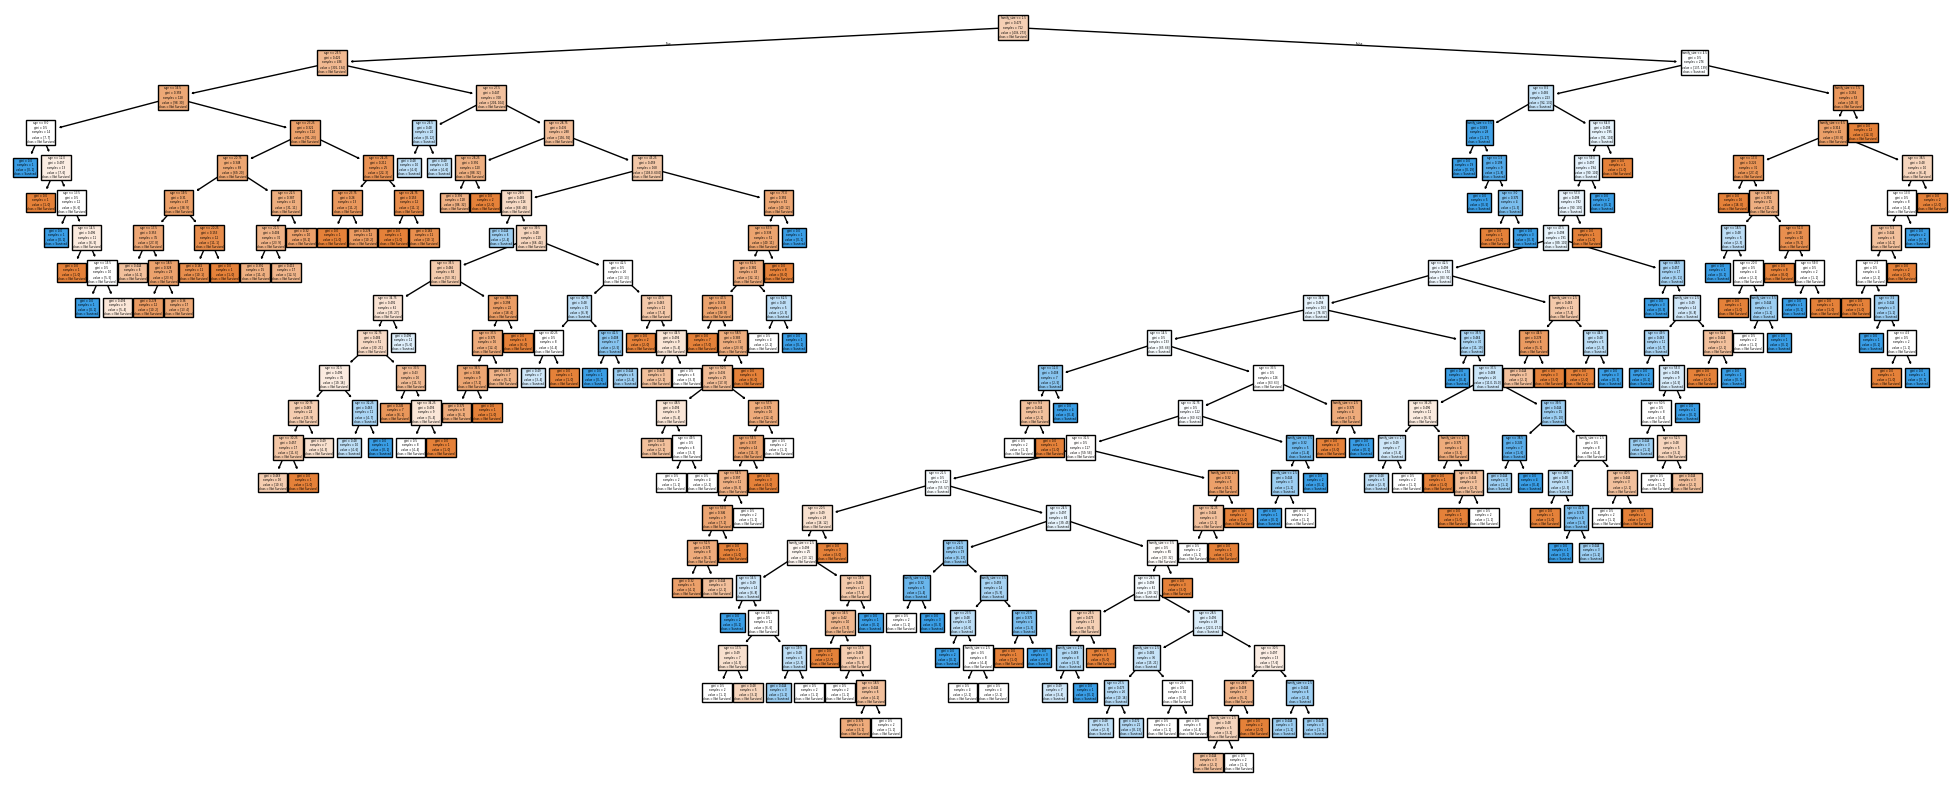

In [17]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")


### Reflection 4:

- How well did the different cases perform?
<br> **In terms of accuracy, Case 1 was 63%, Case 2 was 61%, and Case 3 was 59%.**

- Are there any suprising results?
<br> **I am honestly suprised that none of them are higher than they are. I thought we would see above 70% on at least one of them. It makes me wonder if their are better input values.**

- Which inputs worked better?
<br> **Alone was the best feature in this test for predicting survival.**

### Section 5: Compare Alternative Models (SVC, NN)

In [18]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC RBF)

#### Case 1 Results -- Alone Only

In [32]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### Case 2 Results -- Age Only

In [36]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



#### Case 3 Results -- Age + Family Size

In [19]:
# Create and train a Support Vector Classifier (SVC) model
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### ### 5.1 Train and Evaluate Model (SVC Linear)

#### Case 1 Results -- Alone Only

In [ ]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

#### Case 2 Results -- Age Only

In [ ]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

#### Case 3 -- Age + Family Size

In [ ]:
# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svc = svc_model.predict(X_test)
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

Basic Train/Test split 
 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(train_set))
print('Test size:', len(test_set))

### Basic Train/Test split & Stratified Train/Test split

### Compare Results

In [50]:

# Basic Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Stratified Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train_strat = X.iloc[train_indices]
    X_test_strat = X.iloc[test_indices]
    y_train_strat = y.iloc[train_indices]
    y_test_strat = y.iloc[test_indices]

# Compare distributions
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Basic Test Set Class Distribution:\n", y_test.value_counts(normalize=True))
print("\nStratified Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("Stratified Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Train Set Class Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
Basic Test Set Class Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Stratified Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


#### Reflection 4:

**Why might stratification improve model performance?**

Stratification ensures that the class proportions in both the training and test sets match the original dataset. This prevents the model from being biased toward overrepresented classes and improves generalization.

**How close are the training and test distributions to the original dataset?**

The stratified split produces train and test sets that much more closely match the original class distribution. The basic split introduces some imbalance, especially in the test set, which could affect model performance. 

**Which split method produced better class balance?**

Stratified Shuffle Split performed better.